<a href="https://colab.research.google.com/github/Minatozaki0911/CV202/blob/main/CV202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [77]:
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
import seaborn as sn
import pandas as pd

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/leapGestRecog/'
model_path = '/content/drive/MyDrive/Colab Notebooks/CV202_Model'

In [ ]:
### Encode image label from image name
labels = dict()
count = 0
subdir = sorted(os.listdir(os.path.join(dataset_path, str("01/"))))
for i in subdir:
  labels[i] = count
  count += 1
print(labels)

In [ ]:
x_data = []
y_data = []
datacount = 0 
for i in range(1,3):
  print(i)
  for subdir in os.listdir(os.path.join(dataset_path, str("0"+str(i)+"/"))):
    count = 0
    print(subdir)
    for k in os.listdir(dataset_path + "0" + str(i) + "/" + subdir + "/" ):
      print(k)
      image = cv2.imread(dataset_path + "0" + str(i) + "/" + subdir + "/" + k, cv2.IMREAD_GRAYSCALE) # L = Luminance + grayscale
      image = cv2.resize(image, (320,120))
      arr = np.array(image)

      x_data.append(arr)
      count += 1    # Number of image in dataset
    y_label = np.full(shape=(count, 1), fill_value=labels[subdir])
    y_data.append(y_label)
    datacount += count

x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)
print(datacount)
print(x_data.shape, y_data.shape)


1
04_fist_moved
frame_01_04_0004.png
frame_01_04_0006.png
frame_01_04_0008.png
frame_01_04_0016.png
frame_01_04_0001.png
frame_01_04_0012.png
frame_01_04_0010.png
frame_01_04_0009.png
frame_01_04_0015.png
frame_01_04_0013.png
frame_01_04_0017.png
frame_01_04_0011.png
frame_01_04_0005.png
frame_01_04_0003.png
frame_01_04_0021.png
frame_01_04_0007.png
frame_01_04_0019.png
frame_01_04_0020.png
frame_01_04_0014.png
frame_01_04_0002.png
frame_01_04_0018.png
frame_01_04_0053.png
frame_01_04_0054.png
frame_01_04_0155.png
frame_01_04_0178.png
frame_01_04_0153.png
frame_01_04_0154.png
frame_01_04_0082.png
frame_01_04_0071.png
frame_01_04_0106.png
frame_01_04_0183.png
frame_01_04_0200.png
frame_01_04_0109.png
frame_01_04_0125.png
frame_01_04_0103.png
frame_01_04_0147.png
frame_01_04_0070.png
frame_01_04_0073.png
frame_01_04_0122.png
frame_01_04_0051.png
frame_01_04_0084.png
frame_01_04_0140.png
frame_01_04_0092.png
frame_01_04_0096.png
frame_01_04_0027.png
frame_01_04_0128.png
frame_01_04_0173.p

In [ ]:
x_data = np.expand_dims(x_data, axis=-1)    # expand dimension to fit 4D tensor format
x_data /= 255
print(x_data.shape)
y_data = to_categorical(y_data)  # one hot encoding
print(y_data.shape)

(4000, 120, 320, 1)
(4000, 10)


In [ ]:
### Making Train - Validate - Test dataset with ratio 8-1-1
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5)
print(x_train.shape, x_valid.shape, x_test.shape)

(3200, 120, 320, 1) (400, 120, 320, 1) (400, 120, 320, 1)


In [28]:
def modelInit():
  input = Input(shape =(x_train.shape[1:]))

  # 1st Conv Block
  x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
  x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
  x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

  # 2nd Conv Block
  x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
  x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
  x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

  # Fully connected layers
  x = Flatten()(x)
  x = Dense(units = 1024, activation ='relu')(x)
  x = Dense(units = 512, activation ='relu')(x)
  output = Dense(units = 10, activation ='softmax')(x)
  return Model(inputs=input, outputs=output)

In [29]:
model1 = modelInit()


In [32]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.9, staircase=True)
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [33]:
history = model1.fit(x_train, y_train, 
                    epochs=7, 
                    batch_size=64,
                    validation_data=(x_valid, y_valid),
                    verbose=1)

Epoch 1/7
50/50 [==============================] - 20s 393ms/step - loss: 0.4629 - acc: 0.8728 - val_loss: 0.0286 - val_acc: 0.9850
Epoch 2/7
50/50 [==============================] - 19s 389ms/step - loss: 0.0447 - acc: 0.9891 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/7
50/50 [==============================] - 20s 391ms/step - loss: 7.8412e-04 - acc: 1.0000 - val_loss: 9.7773e-05 - val_acc: 1.0000
Epoch 4/7
50/50 [==============================] - 20s 395ms/step - loss: 1.2408e-04 - acc: 1.0000 - val_loss: 5.0780e-05 - val_acc: 1.0000
Epoch 5/7
50/50 [==============================] - 20s 399ms/step - loss: 5.8898e-05 - acc: 1.0000 - val_loss: 3.1743e-05 - val_acc: 1.0000
Epoch 6/7
50/50 [==============================] - 20s 400ms/step - loss: 4.1077e-05 - acc: 1.0000 - val_loss: 2.2223e-05 - val_acc: 1.0000
Epoch 7/7
50/50 [==============================] - 20s 400ms/step - loss: 2.9703e-05 - acc: 1.0000 - val_loss: 1.7015e-05 - val_acc: 1.0000


In [38]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


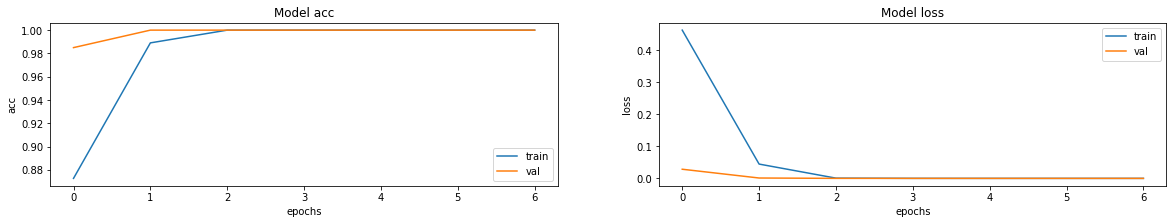

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model1.history.history[metric])
    ax[i].plot(model1.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [79]:
model1.evaluate(x_test, y_test)

13/13 [==============================] - 1s 59ms/step - loss: 2.6671e-05 - acc: 1.0000


[2.667122498678509e-05, 1.0]

In [70]:
y_pred = model1.predict(x_test) 
print(y_pred.shape)
labels = list(labels)
print(labels)

(400, 10)
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


Test data number 300
10_down


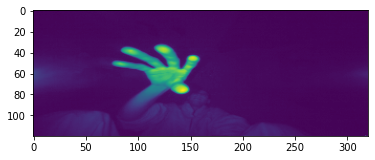

In [66]:
result = labels[np.argmax(y_pred[i])]
print("Test data number "+str(i))
print(result)
plt.imshow(np.squeeze(x_test[i], axis=2))
plt.show()

Confusion matrix


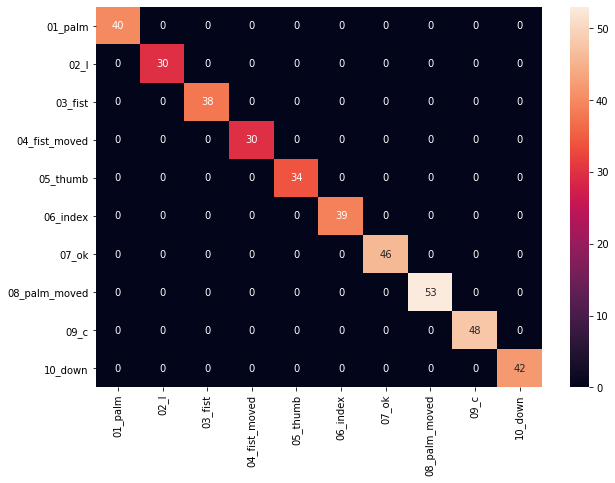

In [78]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion matrix")
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [81]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=labels))

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00        40
         02_l       1.00      1.00      1.00        30
      03_fist       1.00      1.00      1.00        38
04_fist_moved       1.00      1.00      1.00        30
     05_thumb       1.00      1.00      1.00        34
     06_index       1.00      1.00      1.00        39
        07_ok       1.00      1.00      1.00        46
08_palm_moved       1.00      1.00      1.00        53
         09_c       1.00      1.00      1.00        48
      10_down       1.00      1.00      1.00        42

     accuracy                           1.00       400
    macro avg       1.00      1.00      1.00       400
 weighted avg       1.00      1.00      1.00       400

